In [1]:
# Import useful dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo.

from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps.

from datetime import datetime
from datetime import date


In [2]:
# Import the csv file containing the companies in the S&P500.

companies_df = pd.read_csv("sp500/sp500_companies.csv")


In [3]:
# COVID 19 recession:
# Examine COVID 19 recession timeframe:

COVID_start = datetime(2020,2,1)
COVID_end = datetime(2020,4,1)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_start, COVID_end)
    thisyear[sector_list.index(sector)].to_csv(f"COVID_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# COVID 19 recession:
# Establish paths for CSV import in next step.

Energy = "COVID_Recession/^GSPE.csv"
Materials = "COVID_Recession/^SP500-15.csv"
Industrials = "COVID_Recession/^SP500-20.csv"
Consumer_Disc = "COVID_Recession/^SP500-25.csv"
Consumer_Stap = "COVID_Recession/^SP500-30.csv"
Health_Care = "COVID_Recession/^SP500-35.csv"
Financial = "COVID_Recession/^SP500-40.csv"
Technology = "COVID_Recession/^SP500-45.csv"
Communications = "COVID_Recession/^SP500-50.csv"
Utilities = "COVID_Recession/^SP500-55.csv"
Real_Estate = "COVID_Recession/^SP500-60.csv"


# Create a data frame for each sector using its CSV file.

Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)
Real_Estate_df = pd.read_csv(Real_Estate)


# Rename the column headers to avoid conflicts when merging data frames.

Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials_Cleaned_df=Industrials_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc_Cleaned_df=Consumer_Disc_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap_Cleaned_df=Consumer_Stap_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care_Cleaned_df=Health_Care_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial_Cleaned_df=Financial_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology_Cleaned_df=Technology_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications_Cleaned_df=Communications_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities_Cleaned_df=Utilities_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate_Cleaned_df=Real_Estate_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df = pd.merge(combined9_df, Real_Estate_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2020-01-31,405.450012,361.989990,684.119995,992.010010,648.250000,1153.959961,497.100006,1673.910034,182.839996,350.079987,243.619995
1,2020-02-03,400.019989,369.720001,683.840027,997.960022,648.190002,1164.640015,500.059998,1695.989990,185.160004,351.220001,243.940002
2,2020-02-04,400.809998,376.170013,696.419983,1015.539978,651.729980,1184.410034,505.250000,1740.060059,186.460007,347.609985,246.839996
3,2020-02-05,415.970001,383.179993,707.989990,1020.570007,656.669983,1207.709961,515.200012,1750.550049,186.550003,349.070007,246.669998
4,2020-02-06,411.640015,382.869995,710.169983,1018.969971,658.840027,1209.050049,514.330017,1766.000000,188.679993,348.980011,247.660004


In [5]:
# COVID 19 recession:
# Create an empty list to house the closing price for each sector, the list of sector names and the date on the eve of the recession.

eve_price=[]
sectors_title=["Energy", "Materials", "Industrials", "Consumer Disc", "Consumer Stap", "Health Care", "Financial", "Technology", "Communications", "Utilities", "Real Estate"]
eve_date_list=[]
end_date_list=[]


In [6]:
# COVID 19 recession:
# Extract the closing price for each sector on the eve of the recession and its corresponding date.

for sector in sectors_title:
    try:
        Price_Start = Combined_Sectors_df[f"{sector} Close"][0]
        eve_price.append(Price_Start)
        eve_date=Combined_Sectors_df["Date"][0]
        eve_date_list.append(eve_date)
        end_date_list.append(COVID_end)
    except KeyError:
        eve_price.append("No Data")
        
# Create a dataframe for Recession Start Dates, End Dates, Sector and Sector Price (eve of recession).

Eve_Sector_df=pd.DataFrame({"Recession Start":eve_date_list, "Recession End":end_date_list, "Sector":sectors_title, "Eve Price":eve_price})
Eve_Sector_df


,Recession Start,Recession End,Sector,Eve Price
0,2020-01-31,2020-04-01,Energy,405.450012
1,2020-01-31,2020-04-01,Materials,361.989990
2,2020-01-31,2020-04-01,Industrials,684.119995
3,2020-01-31,2020-04-01,Consumer Disc,992.010010
4,2020-01-31,2020-04-01,Consumer Stap,648.250000
5,2020-01-31,2020-04-01,Health Care,1153.959961
6,2020-01-31,2020-04-01,Financial,497.100006
7,2020-01-31,2020-04-01,Technology,1673.910034
8,2020-01-31,2020-04-01,Communications,182.839996
9,2020-01-31,2020-04-01,Utilities,350.079987


In [7]:
# COVID 19 recession:
# Examine all of the POST COVID 19 recession data:

COVID_end = datetime(2020,4,1)
Today_Date = datetime(2022,3,22)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_end, Today_Date)
    thisyear[sector_list.index(sector)].to_csv(f"Post_COVID_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# COVID 19 recession:
# Establish paths for CSV import in next step.

Energy2 = "Post_COVID_Recession/^GSPE.csv"
Materials2 = "Post_COVID_Recession/^SP500-15.csv"
Industrials2 = "Post_COVID_Recession/^SP500-20.csv"
Consumer_Disc2 = "Post_COVID_Recession/^SP500-25.csv"
Consumer_Stap2 = "Post_COVID_Recession/^SP500-30.csv"
Health_Care2 = "Post_COVID_Recession/^SP500-35.csv"
Financial2 = "Post_COVID_Recession/^SP500-40.csv"
Technology2 = "Post_COVID_Recession/^SP500-45.csv"
Communications2 = "Post_COVID_Recession/^SP500-50.csv"
Utilities2 = "Post_COVID_Recession/^SP500-55.csv"
Real_Estate2 = "Post_COVID_Recession/^SP500-60.csv"


# Create a data frame for each sector using its CSV file.

Energy2_df = pd.read_csv(Energy2)
Materials2_df = pd.read_csv(Materials2)
Industrials2_df = pd.read_csv(Industrials2)
Consumer_Disc2_df = pd.read_csv(Consumer_Disc2)
Consumer_Stap2_df = pd.read_csv(Consumer_Stap2)
Health_Care2_df = pd.read_csv(Health_Care2)
Financial2_df = pd.read_csv(Financial2)
Technology2_df = pd.read_csv(Technology2)
Communications2_df = pd.read_csv(Communications2)
Utilities2_df = pd.read_csv(Utilities2)
Real_Estate2_df = pd.read_csv(Real_Estate2)


# Rename the column headers to avoid conflicts when merging data frames.

Energy2_Cleaned_df=Energy2_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials2_Cleaned_df=Materials2_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials2_Cleaned_df=Industrials2_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc2_Cleaned_df=Consumer_Disc2_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap2_Cleaned_df=Consumer_Stap2_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care2_Cleaned_df=Health_Care2_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial2_Cleaned_df=Financial2_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology2_Cleaned_df=Technology2_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications2_Cleaned_df=Communications2_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities2_Cleaned_df=Utilities2_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate2_Cleaned_df=Real_Estate2_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy2_Cleaned_df, Materials2_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials2_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc2_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap2_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care2_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial2_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology2_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications2_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df = pd.merge(combined9_df, Real_Estate2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2020-03-31,223.399994,283.230011,499.119995,793.109985,560.330017,1032.900024,346.019989,1414.359985,150.350006,281.769989,192.639999
1,2020-04-01,213.039993,270.220001,476.239990,761.659973,550.080017,993.020020,325.369995,1347.680054,144.440002,264.529999,180.869995
2,2020-04-02,232.369995,274.269989,483.200012,764.320007,566.000000,1020.679993,333.399994,1378.359985,147.070007,272.850006,183.289993
3,2020-04-03,229.259995,267.859985,475.700012,753.090027,569.070007,1010.869995,325.950012,1355.599976,143.839996,262.970001,181.899994
4,2020-04-06,241.070007,288.230011,509.100006,811.309998,591.380005,1065.430054,350.260010,1474.589966,153.479996,283.609985,195.020004


In [9]:
# COVID 19 recession:
# Establish an empty list to house each sector's recovery date. 

recovery_dates=[]

# Analyse each sector's recovery.

# Energy:

Energy_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Energy Close"]>= eve_price[0], :]
Energy_Recovery_First_Row=Energy_Higher_Than_Eve_df.iloc[0,:].tolist()
Energy_Recovery_Date=Energy_Recovery_First_Row[0]
recovery_dates.append(Energy_Recovery_Date)

# Materials

Materials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Materials Close"]>= eve_price[1], :]
Materials_Recovery_First_Row=Materials_Higher_Than_Eve_df.iloc[0,:].tolist()
Materials_Recovery_Date=Materials_Recovery_First_Row[0]
recovery_dates.append(Materials_Recovery_Date)

#Industrials

Industrials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Industrials Close"]>= eve_price[2], :]
Industrials_Recovery_First_Row=Industrials_Higher_Than_Eve_df.iloc[0,:].tolist()
Industrials_Recovery_Date=Industrials_Recovery_First_Row[0]
recovery_dates.append(Industrials_Recovery_Date)

#Consumer Disc

Consumer_Disc_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Disc Close"]>= eve_price[3], :]
Consumer_Disc_Recovery_First_Row=Consumer_Disc_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Disc_Recovery_Date=Consumer_Disc_Recovery_First_Row[0]
recovery_dates.append(Consumer_Disc_Recovery_Date)

#Consumer Stap

Consumer_Stap_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Stap Close"]>= eve_price[4], :]
Consumer_Stap_Recovery_First_Row=Consumer_Stap_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Stap_Recovery_Date=Consumer_Stap_Recovery_First_Row[0]
recovery_dates.append(Consumer_Stap_Recovery_Date)

# Health Care

Health_Care_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Health Care Close"]>= eve_price[5], :]
Health_Care_Recovery_First_Row=Health_Care_Higher_Than_Eve_df.iloc[0,:].tolist()
Health_Care_Recovery_Date=Health_Care_Recovery_First_Row[0]
recovery_dates.append(Health_Care_Recovery_Date)

# Financial

Financial_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Financial Close"]>= eve_price[6], :]
Financial_Recovery_First_Row=Financial_Higher_Than_Eve_df.iloc[0,:].tolist()
Financial_Recovery_Date=Financial_Recovery_First_Row[0]
recovery_dates.append(Financial_Recovery_Date)

# Technology

Technology_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Technology Close"]>= eve_price[7], :]
Technology_Recovery_First_Row=Technology_Higher_Than_Eve_df.iloc[0,:].tolist()
Technology_Recovery_Date=Technology_Recovery_First_Row[0]
recovery_dates.append(Technology_Recovery_Date)

# Communications

Communications_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Communications Close"]>= eve_price[8], :]
Communications_Recovery_First_Row=Communications_Higher_Than_Eve_df.iloc[0,:].tolist()
Communications_Recovery_Date=Communications_Recovery_First_Row[0]
recovery_dates.append(Communications_Recovery_Date)

# Utilities

Utilities_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Utilities Close"]>= eve_price[9], :]
Utilities_Recovery_First_Row=Utilities_Higher_Than_Eve_df.iloc[0,:].tolist()
Utilities_Recovery_Date=Utilities_Recovery_First_Row[0]
recovery_dates.append(Utilities_Recovery_Date)

# Real Estate

Real_Estate_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Real Estate Close"]>= eve_price[10], :]
Real_Estate_Recovery_First_Row=Real_Estate_Higher_Than_Eve_df.iloc[0,:].tolist()
Real_Estate_Recovery_Date=Real_Estate_Recovery_First_Row[0]
recovery_dates.append(Real_Estate_Recovery_Date)


In [10]:
# COVID 19 recession:
# Put the recovery dates in their own data frame.

Recovery_Dates_df=pd.DataFrame({"Date":recovery_dates, "Sector":sectors_title})


# Merge the recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_df=pd.merge(Eve_Sector_df, Recovery_Dates_df, on='Sector')
Eve_to_Recovery_df=Eve_to_Recovery_df.rename(columns={"Date":"Recovery Date"})


# Format all of the dates so as to remove the time.

Eve_to_Recovery_df['Recession End'] = pd.to_datetime(Eve_to_Recovery_df['Recession End']).dt.date
Eve_to_Recovery_df['Recession Start'] = pd.to_datetime(Eve_to_Recovery_df['Recession Start']).dt.date
Eve_to_Recovery_df['Recovery Date'] = pd.to_datetime(Eve_to_Recovery_df['Recovery Date']).dt.date


In [11]:
# COVID 19 recession:
# Determine the number of days between Recession End and Recovery Date for each sector.

Days_To_Recover_df=Eve_to_Recovery_df['Recovery Date']-Eve_to_Recovery_df['Recession End']
Eve_to_Recovery_df["Days to Recover"]=Days_To_Recover_df


# Determine the number of days between Recession Start and Recession End for each sector.

Length_Of_Recession_df=Eve_to_Recovery_df['Recession End']-Eve_to_Recovery_df['Recession Start']
Eve_to_Recovery_df["Length of Recession"]=Length_Of_Recession_df


# Express the recovery time as a percentage of the recession length for each sector.

Percentage_df=Eve_to_Recovery_df['Days to Recover']/Eve_to_Recovery_df['Length of Recession']
Eve_to_Recovery_df["QRec"]=Percentage_df
Eve_to_Recovery_df

,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17,411 days,61 days,6.737705
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03,63 days,61 days,1.032787
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12,194 days,61 days,3.180328
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26,55 days,61 days,0.901639
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04,125 days,61 days,2.049180
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17,16 days,61 days,0.262295
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06,280 days,61 days,4.590164
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11,40 days,61 days,0.655738
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02,62 days,61 days,1.016393
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17,503 days,61 days,8.245902


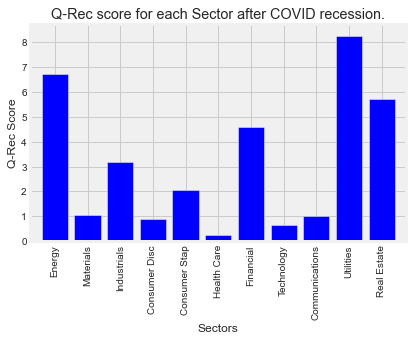

In [12]:
# COVID 19 recession:
# Create bar chart.

sectors=Eve_to_Recovery_df["Sector"].tolist()
QRec = Eve_to_Recovery_df["QRec"].tolist()

x_axis=np.arange(len(QRec))
plt.bar(x_axis, QRec, color="b", align="center")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, sectors, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("Q-Rec score for each Sector after COVID recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

plt.savefig(f"QRec by Sector ({COVID_start.year}).png") 


In [13]:
# plt.figure(figsize=(15, 40))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, sector in enumerate(sector_list, 1):
#     plt.subplot(11, 2, i)
#     thisyear[i-1]['Adj Close'].plot()
#     plt.ylabel('Adj Close')
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {sector_name[i - 1]}")
# plt.tight_layout()
# plt.savefig(f"Adj Close Change by Sectors({COVID_start.year}).png")  

In [14]:
# COVID 19 recession:
# Establish paths for CSV import in next step.

Market = "COVID_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market_df = pd.read_csv(Market)


# Rename the column headers to avoid conflicts when merging data frames.

Market_Cleaned_df=Market_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})

#Determine the Market price on the eve of the recession.

Market_Price_Eve = Market_Cleaned_df["Market Close"][0]
Market_eve_date=Market_Cleaned_df["Date"][0]
Market_Price_Eve


3225.52001953125

In [15]:
# COVID 19 recession:
# Establish paths for CSV import in next step.

Market2 = "Post_COVID_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market2_df = pd.read_csv(Market2)


# Rename the column headers to avoid conflicts when merging data frames.

Market2_Cleaned_df=Market2_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})


In [16]:
# COVID 19 recession:
# Establish an empty list to house the market's recovery date. 

market_recovery_date=[]


# Analyse the market's recovery.

Market_Higher_Than_Eve_df=Market2_Cleaned_df.loc[Market2_Cleaned_df["Market Close"]>= Market_Price_Eve, :]
Market_Recovery_First_Row=Market_Higher_Than_Eve_df.iloc[0,:].tolist()
Market_Recovery_Date=Market_Recovery_First_Row[0]
Market_Recovery_Date


'2020-06-08'

In [17]:
# COVID 19 recession:
# Determine the number of days between Recession End and Recovery Date for the market.

market_recovery_date=[]
for sector in sectors_title:
    market_recovery_date.append(Market_Recovery_Date)

    
# Put the recovery dates in their own data frame.

Market_Recovery_Date_df=pd.DataFrame({"Market Recovery Date":market_recovery_date, "Sector":sectors_title})


# Merge the market recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_MARKET_df=pd.merge(Eve_to_Recovery_df, Market_Recovery_Date_df, on='Sector')


# Format all of the dates so as to remove the time.

Eve_to_Recovery_MARKET_df['Market Recovery Date'] = pd.to_datetime(Eve_to_Recovery_MARKET_df['Market Recovery Date']).dt.date


# Determine the number of days between Recession Start and Recovery Date for each sector.

Market_Days_To_Recover=Eve_to_Recovery_MARKET_df['Market Recovery Date']-Eve_to_Recovery_MARKET_df['Recession End']
Eve_to_Recovery_MARKET_df["Market Days to Recover"]=Market_Days_To_Recover


# Express the recovery time as a percentage of the recession length for the market.

Market_QRec_df=Eve_to_Recovery_MARKET_df['Market Days to Recover']/Eve_to_Recovery_MARKET_df['Length of Recession']
Eve_to_Recovery_MARKET_df["Market QRec"]=Market_QRec_df
Eve_to_Recovery_MARKET_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec,Market Recovery Date,Market Days to Recover,Market QRec
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17,411 days,61 days,6.737705,2020-06-08,68 days,1.114754
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03,63 days,61 days,1.032787,2020-06-08,68 days,1.114754
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12,194 days,61 days,3.180328,2020-06-08,68 days,1.114754
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26,55 days,61 days,0.901639,2020-06-08,68 days,1.114754
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04,125 days,61 days,2.049180,2020-06-08,68 days,1.114754
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17,16 days,61 days,0.262295,2020-06-08,68 days,1.114754
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06,280 days,61 days,4.590164,2020-06-08,68 days,1.114754
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11,40 days,61 days,0.655738,2020-06-08,68 days,1.114754
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02,62 days,61 days,1.016393,2020-06-08,68 days,1.114754
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17,503 days,61 days,8.245902,2020-06-08,68 days,1.114754


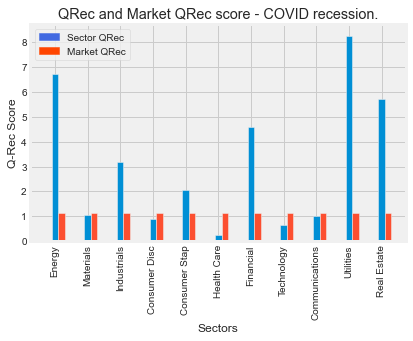

In [18]:
# COVID 19 recession:
# Create bar chart for Sector QRec and Market QRec.

w=0.2
x=Eve_to_Recovery_MARKET_df["Sector"].tolist()

QRec = Eve_to_Recovery_MARKET_df["QRec"].tolist()
Market_QRec = Eve_to_Recovery_MARKET_df["Market QRec"].tolist()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, QRec, w, label="sector")
plt.bar(bar2, Market_QRec, w, label="market")

plt.xticks(bar1, x, rotation='vertical')

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("QRec and Market QRec score - COVID recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

colors = {'Sector QRec':'royalblue', 'Market QRec':'orangered'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig(f"QRec and Market QRec by Sector ({COVID_start.year}).png")  


In [19]:
# GFC recession:
# Examine GFC recession timeframe:

GFC_start = datetime(2007,12,1)
GFC_end = datetime(2009,6,1)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, GFC_start, GFC_end)
    thisyear[sector_list.index(sector)].to_csv(f"GFC_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
# GFC recession:
# Establish paths for CSV import in next step.

Energy = "GFC_Recession/^GSPE.csv"
Materials = "GFC_Recession/^SP500-15.csv"
Industrials = "GFC_Recession/^SP500-20.csv"
Consumer_Disc = "GFC_Recession/^SP500-25.csv"
Consumer_Stap = "GFC_Recession/^SP500-30.csv"
Health_Care = "GFC_Recession/^SP500-35.csv"
Financial = "GFC_Recession/^SP500-40.csv"
Technology = "GFC_Recession/^SP500-45.csv"
Communications = "GFC_Recession/^SP500-50.csv"
Utilities = "GFC_Recession/^SP500-55.csv"
Real_Estate = "GFC_Recession/^SP500-60.csv"


# Create a data frame for each sector using its CSV file.

Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)
Real_Estate_df = pd.read_csv(Real_Estate)


# Rename the column headers to avoid conflicts when merging data frames.

Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials_Cleaned_df=Industrials_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc_Cleaned_df=Consumer_Disc_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap_Cleaned_df=Consumer_Stap_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care_Cleaned_df=Health_Care_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial_Cleaned_df=Financial_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology_Cleaned_df=Technology_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications_Cleaned_df=Communications_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities_Cleaned_df=Utilities_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate_Cleaned_df=Real_Estate_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df = pd.merge(combined9_df, Real_Estate_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2007-11-30,562.130005,257.589996,357.470001,273.029999,303.329987,422.809998,415.890015,405.640015,163.229996,216.029999,151.550003
1,2007-12-03,563.830017,256.570007,353.540009,271.980011,302.019989,420.109985,411.079987,402.019989,163.509995,217.550003,150.369995
2,2007-12-04,558.919983,254.850006,351.420013,270.899994,301.709991,418.839996,403.459991,400.839996,162.479996,219.690002,146.330002
3,2007-12-05,569.239990,259.269989,356.630005,270.160004,303.510010,423.929993,411.589996,410.950012,164.649994,223.139999,151.690002
4,2007-12-06,583.150024,264.359985,362.390015,273.130005,305.540009,426.059998,422.359985,416.880005,165.789993,222.820007,156.660004


In [21]:
# GFC recession:
# Create an empty list to house the closing price for each sector, the list of sector names and the date on the eve of the recession.

eve_price=[]
sectors_title=["Energy", "Materials", "Industrials", "Consumer Disc", "Consumer Stap", "Health Care", "Financial", "Technology", "Communications", "Utilities", "Real Estate"]
eve_date_list=[]
end_date_list=[]


In [22]:
# GFC recession:
# Extract the closing price for each sector on the eve of the recession and its corresponding date.

for sector in sectors_title:
    try:
        Price_Start = Combined_Sectors_df[f"{sector} Close"][0]
        eve_price.append(Price_Start)
        eve_date=Combined_Sectors_df["Date"][0]
        eve_date_list.append(eve_date)
        end_date_list.append(GFC_end)
    except KeyError:
        eve_price.append("No Data")
        
# Create a dataframe for Recession Start Dates, End Dates, Sector and Sector Price (eve of recession).

Eve_Sector_df=pd.DataFrame({"Recession Start":eve_date_list, "Recession End":end_date_list, "Sector":sectors_title, "Eve Price":eve_price})
Eve_Sector_df


,Recession Start,Recession End,Sector,Eve Price
0,2007-11-30,2009-06-01,Energy,562.130005
1,2007-11-30,2009-06-01,Materials,257.589996
2,2007-11-30,2009-06-01,Industrials,357.470001
3,2007-11-30,2009-06-01,Consumer Disc,273.029999
4,2007-11-30,2009-06-01,Consumer Stap,303.329987
5,2007-11-30,2009-06-01,Health Care,422.809998
6,2007-11-30,2009-06-01,Financial,415.890015
7,2007-11-30,2009-06-01,Technology,405.640015
8,2007-11-30,2009-06-01,Communications,163.229996
9,2007-11-30,2009-06-01,Utilities,216.029999


In [23]:
# GFC recession:
# Examine all of the POST GFC recession data:

GFC_end = datetime(2009,6,1)
Today_Date = datetime(2022,3,22)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, GFC_end, Today_Date)
    thisyear[sector_list.index(sector)].to_csv(f"Post_GFC_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# GFC recession:
# Establish paths for CSV import in next step.

Energy2 = "Post_GFC_Recession/^GSPE.csv"
Materials2 = "Post_GFC_Recession/^SP500-15.csv"
Industrials2 = "Post_GFC_Recession/^SP500-20.csv"
Consumer_Disc2 = "Post_GFC_Recession/^SP500-25.csv"
Consumer_Stap2 = "Post_GFC_Recession/^SP500-30.csv"
Health_Care2 = "Post_GFC_Recession/^SP500-35.csv"
Financial2 = "Post_GFC_Recession/^SP500-40.csv"
Technology2 = "Post_GFC_Recession/^SP500-45.csv"
Communications2 = "Post_GFC_Recession/^SP500-50.csv"
Utilities2 = "Post_GFC_Recession/^SP500-55.csv"
Real_Estate2 = "Post_GFC_Recession/^SP500-60.csv"


# Create a data frame for each sector using its CSV file.

Energy2_df = pd.read_csv(Energy2)
Materials2_df = pd.read_csv(Materials2)
Industrials2_df = pd.read_csv(Industrials2)
Consumer_Disc2_df = pd.read_csv(Consumer_Disc2)
Consumer_Stap2_df = pd.read_csv(Consumer_Stap2)
Health_Care2_df = pd.read_csv(Health_Care2)
Financial2_df = pd.read_csv(Financial2)
Technology2_df = pd.read_csv(Technology2)
Communications2_df = pd.read_csv(Communications2)
Utilities2_df = pd.read_csv(Utilities2)
Real_Estate2_df = pd.read_csv(Real_Estate2)


# Rename the column headers to avoid conflicts when merging data frames.

Energy2_Cleaned_df=Energy2_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials2_Cleaned_df=Materials2_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials2_Cleaned_df=Industrials2_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc2_Cleaned_df=Consumer_Disc2_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap2_Cleaned_df=Consumer_Stap2_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care2_Cleaned_df=Health_Care2_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial2_Cleaned_df=Financial2_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology2_Cleaned_df=Technology2_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications2_Cleaned_df=Communications2_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities2_Cleaned_df=Utilities2_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate2_Cleaned_df=Real_Estate2_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy2_Cleaned_df, Materials2_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials2_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc2_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap2_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care2_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial2_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology2_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications2_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df = pd.merge(combined9_df, Real_Estate2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2009-06-01,407.519989,167.330002,205.009995,189.949997,242.729996,300.190002,165.309998,285.640015,102.769997,139.500000,71.480003
1,2009-06-02,407.690002,169.550003,205.889999,191.679993,245.389999,303.440002,163.320007,284.269989,103.730003,137.910004,69.570000
2,2009-06-03,394.070007,163.559998,201.820007,189.779999,244.000000,302.100006,160.880005,282.970001,102.400002,135.460007,69.629997
3,2009-06-04,401.980011,167.179993,205.429993,189.270004,244.229996,298.359985,167.259995,287.179993,102.320000,136.600006,71.959999
4,2009-06-05,398.250000,164.449997,206.550003,188.039993,242.720001,296.420013,164.220001,286.859985,102.160004,136.289993,69.959999


In [25]:
# GFC recession:
# Establish an empty list to house each sector's recovery date. 

recovery_dates=[]

# Analyse each sector's recovery.

# Energy:

Energy_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Energy Close"]>= eve_price[0], :]
Energy_Recovery_First_Row=Energy_Higher_Than_Eve_df.iloc[0,:].tolist()
Energy_Recovery_Date=Energy_Recovery_First_Row[0]
recovery_dates.append(Energy_Recovery_Date)

# Materials

Materials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Materials Close"]>= eve_price[1], :]
Materials_Recovery_First_Row=Materials_Higher_Than_Eve_df.iloc[0,:].tolist()
Materials_Recovery_Date=Materials_Recovery_First_Row[0]
recovery_dates.append(Materials_Recovery_Date)

#Industrials

Industrials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Industrials Close"]>= eve_price[2], :]
Industrials_Recovery_First_Row=Industrials_Higher_Than_Eve_df.iloc[0,:].tolist()
Industrials_Recovery_Date=Industrials_Recovery_First_Row[0]
recovery_dates.append(Industrials_Recovery_Date)

#Consumer Disc

Consumer_Disc_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Disc Close"]>= eve_price[3], :]
Consumer_Disc_Recovery_First_Row=Consumer_Disc_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Disc_Recovery_Date=Consumer_Disc_Recovery_First_Row[0]
recovery_dates.append(Consumer_Disc_Recovery_Date)

#Consumer Stap

Consumer_Stap_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Stap Close"]>= eve_price[4], :]
Consumer_Stap_Recovery_First_Row=Consumer_Stap_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Stap_Recovery_Date=Consumer_Stap_Recovery_First_Row[0]
recovery_dates.append(Consumer_Stap_Recovery_Date)

# Health Care

Health_Care_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Health Care Close"]>= eve_price[5], :]
Health_Care_Recovery_First_Row=Health_Care_Higher_Than_Eve_df.iloc[0,:].tolist()
Health_Care_Recovery_Date=Health_Care_Recovery_First_Row[0]
recovery_dates.append(Health_Care_Recovery_Date)

# Financial

Financial_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Financial Close"]>= eve_price[6], :]
Financial_Recovery_First_Row=Financial_Higher_Than_Eve_df.iloc[0,:].tolist()
Financial_Recovery_Date=Financial_Recovery_First_Row[0]
recovery_dates.append(Financial_Recovery_Date)

# Technology

Technology_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Technology Close"]>= eve_price[7], :]
Technology_Recovery_First_Row=Technology_Higher_Than_Eve_df.iloc[0,:].tolist()
Technology_Recovery_Date=Technology_Recovery_First_Row[0]
recovery_dates.append(Technology_Recovery_Date)

# Communications

Communications_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Communications Close"]>= eve_price[8], :]
Communications_Recovery_First_Row=Communications_Higher_Than_Eve_df.iloc[0,:].tolist()
Communications_Recovery_Date=Communications_Recovery_First_Row[0]
recovery_dates.append(Communications_Recovery_Date)

# Utilities

Utilities_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Utilities Close"]>= eve_price[9], :]
Utilities_Recovery_First_Row=Utilities_Higher_Than_Eve_df.iloc[0,:].tolist()
Utilities_Recovery_Date=Utilities_Recovery_First_Row[0]
recovery_dates.append(Utilities_Recovery_Date)

# Real Estate

Real_Estate_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Real Estate Close"]>= eve_price[10], :]
Real_Estate_Recovery_First_Row=Real_Estate_Higher_Than_Eve_df.iloc[0,:].tolist()
Real_Estate_Recovery_Date=Real_Estate_Recovery_First_Row[0]
recovery_dates.append(Real_Estate_Recovery_Date)


In [26]:
# GFC recession:
# Put the recovery dates in their own data frame.

Recovery_Dates_df=pd.DataFrame({"Date":recovery_dates, "Sector":sectors_title})


# Merge the recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_df=pd.merge(Eve_Sector_df, Recovery_Dates_df, on='Sector')
Eve_to_Recovery_df=Eve_to_Recovery_df.rename(columns={"Date":"Recovery Date"})


# Format all of the dates so as to remove the time.

Eve_to_Recovery_df['Recession End'] = pd.to_datetime(Eve_to_Recovery_df['Recession End']).dt.date
Eve_to_Recovery_df['Recession Start'] = pd.to_datetime(Eve_to_Recovery_df['Recession Start']).dt.date
Eve_to_Recovery_df['Recovery Date'] = pd.to_datetime(Eve_to_Recovery_df['Recovery Date']).dt.date


In [27]:
# GFC recession:
# Determine the number of days between Recession End and Recovery Date for each sector.

Days_To_Recover_df=Eve_to_Recovery_df['Recovery Date']-Eve_to_Recovery_df['Recession End']
Eve_to_Recovery_df["Days to Recover"]=Days_To_Recover_df


# Determine the number of days between Recession Start and Recession End for each sector.

Length_Of_Recession_df=Eve_to_Recovery_df['Recession End']-Eve_to_Recovery_df['Recession Start']
Eve_to_Recovery_df["Length of Recession"]=Length_Of_Recession_df


# Express the recovery time as a percentage of the recession length for each sector.

Percentage_df=Eve_to_Recovery_df['Days to Recover']/Eve_to_Recovery_df['Length of Recession']
Eve_to_Recovery_df["QRec"]=Percentage_df
Eve_to_Recovery_df

,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec
0,2007-11-30,2009-06-01,Energy,562.130005,2011-02-14,623 days,549 days,1.134791
1,2007-11-30,2009-06-01,Materials,257.589996,2013-05-17,1446 days,549 days,2.633880
2,2007-11-30,2009-06-01,Industrials,357.470001,2013-02-19,1359 days,549 days,2.475410
3,2007-11-30,2009-06-01,Consumer Disc,273.029999,2010-04-14,317 days,549 days,0.577413
4,2007-11-30,2009-06-01,Consumer Stap,303.329987,2010-12-16,563 days,549 days,1.025501
5,2007-11-30,2009-06-01,Health Care,422.809998,2012-03-13,1016 days,549 days,1.850638
6,2007-11-30,2009-06-01,Financial,415.890015,2017-03-01,2830 days,549 days,5.154827
7,2007-11-30,2009-06-01,Technology,405.640015,2010-12-13,560 days,549 days,1.020036
8,2007-11-30,2009-06-01,Communications,163.229996,2013-04-10,1409 days,549 days,2.566485
9,2007-11-30,2009-06-01,Utilities,216.029999,2014-04-15,1779 days,549 days,3.240437


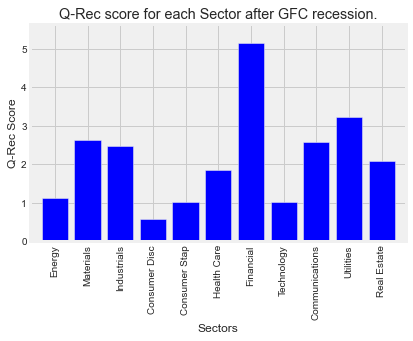

In [28]:
# GFC recession:
# Create bar chart.

sectors=Eve_to_Recovery_df["Sector"].tolist()
QRec = Eve_to_Recovery_df["QRec"].tolist()

x_axis=np.arange(len(QRec))
plt.bar(x_axis, QRec, color="b", align="center")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, sectors, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("Q-Rec score for each Sector after GFC recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

plt.savefig(f"QRec by Sector ({GFC_start.year}).png") 


In [29]:
# GFC recession:
# Establish paths for CSV import in next step.

Market = "GFC_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market_df = pd.read_csv(Market)


# Rename the column headers to avoid conflicts when merging data frames.

Market_Cleaned_df=Market_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})

#Determine the Market price on the eve of the recession.

Market_Price_Eve = Market_Cleaned_df["Market Close"][0]
Market_eve_date=Market_Cleaned_df["Date"][0]
Market_Price_Eve


1481.1400146484375

In [30]:
# GFC recession:
# Establish paths for CSV import in next step.

Market2 = "Post_GFC_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market2_df = pd.read_csv(Market2)


# Rename the column headers to avoid conflicts when merging data frames.

Market2_Cleaned_df=Market2_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})


In [31]:
# GFC 19 recession:
# Establish an empty list to house the market's recovery date. 

market_recovery_date=[]


# Analyse the market's recovery.

Market_Higher_Than_Eve_df=Market2_Cleaned_df.loc[Market2_Cleaned_df["Market Close"]>= Market_Price_Eve, :]
Market_Recovery_First_Row=Market_Higher_Than_Eve_df.iloc[0,:].tolist()
Market_Recovery_Date=Market_Recovery_First_Row[0]
Market_Recovery_Date


'2013-01-18'

In [32]:
# GFC recession:
# Determine the number of days between Recession End and Recovery Date for the market.

market_recovery_date=[]
for sector in sectors_title:
    market_recovery_date.append(Market_Recovery_Date)

    
# Put the recovery dates in their own data frame.

Market_Recovery_Date_df=pd.DataFrame({"Market Recovery Date":market_recovery_date, "Sector":sectors_title})


# Merge the market recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_MARKET1_df=pd.merge(Eve_to_Recovery_df, Market_Recovery_Date_df, on='Sector')


# Format all of the dates so as to remove the time.

Eve_to_Recovery_MARKET1_df['Market Recovery Date'] = pd.to_datetime(Eve_to_Recovery_MARKET1_df['Market Recovery Date']).dt.date


# Determine the number of days between Recession Start and Recovery Date for each sector.

Market_Days_To_Recover=Eve_to_Recovery_MARKET1_df['Market Recovery Date']-Eve_to_Recovery_MARKET1_df['Recession End']
Eve_to_Recovery_MARKET1_df["Market Days to Recover"]=Market_Days_To_Recover


# Express the recovery time as a percentage of the recession length for the market.

Market_QRec_df=Eve_to_Recovery_MARKET1_df['Market Days to Recover']/Eve_to_Recovery_MARKET1_df['Length of Recession']
Eve_to_Recovery_MARKET1_df["Market QRec"]=Market_QRec_df
Eve_to_Recovery_MARKET1_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec,Market Recovery Date,Market Days to Recover,Market QRec
0,2007-11-30,2009-06-01,Energy,562.130005,2011-02-14,623 days,549 days,1.134791,2013-01-18,1327 days,2.417122
1,2007-11-30,2009-06-01,Materials,257.589996,2013-05-17,1446 days,549 days,2.633880,2013-01-18,1327 days,2.417122
2,2007-11-30,2009-06-01,Industrials,357.470001,2013-02-19,1359 days,549 days,2.475410,2013-01-18,1327 days,2.417122
3,2007-11-30,2009-06-01,Consumer Disc,273.029999,2010-04-14,317 days,549 days,0.577413,2013-01-18,1327 days,2.417122
4,2007-11-30,2009-06-01,Consumer Stap,303.329987,2010-12-16,563 days,549 days,1.025501,2013-01-18,1327 days,2.417122
5,2007-11-30,2009-06-01,Health Care,422.809998,2012-03-13,1016 days,549 days,1.850638,2013-01-18,1327 days,2.417122
6,2007-11-30,2009-06-01,Financial,415.890015,2017-03-01,2830 days,549 days,5.154827,2013-01-18,1327 days,2.417122
7,2007-11-30,2009-06-01,Technology,405.640015,2010-12-13,560 days,549 days,1.020036,2013-01-18,1327 days,2.417122
8,2007-11-30,2009-06-01,Communications,163.229996,2013-04-10,1409 days,549 days,2.566485,2013-01-18,1327 days,2.417122
9,2007-11-30,2009-06-01,Utilities,216.029999,2014-04-15,1779 days,549 days,3.240437,2013-01-18,1327 days,2.417122


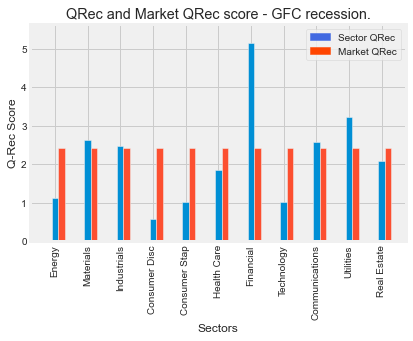

In [33]:
# GFC recession:
# Create bar chart for Sector QRec and Market QRec.

w=0.2
x=Eve_to_Recovery_MARKET1_df["Sector"].tolist()

QRec = Eve_to_Recovery_MARKET1_df["QRec"].tolist()
Market_QRec = Eve_to_Recovery_MARKET1_df["Market QRec"].tolist()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, QRec, w, label="sector")
plt.bar(bar2, Market_QRec, w, label="market")

plt.xticks(bar1, x, rotation='vertical')

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("QRec and Market QRec score - GFC recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

colors = {'Sector QRec':'royalblue', 'Market QRec':'orangered'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig(f"QRec and Market QRec by Sector ({GFC_start.year}).png")  

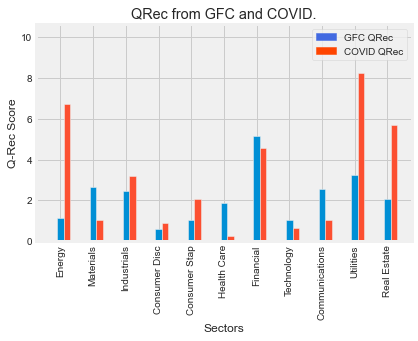

In [34]:
# GFC recession:
# Create bar chart for Sector QRec and Market QRec.

w=0.2
x=Eve_to_Recovery_MARKET1_df["Sector"].tolist()

QRecGFC = Eve_to_Recovery_MARKET1_df["QRec"].tolist()
QRecCOVID = Eve_to_Recovery_MARKET_df["QRec"].tolist()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, QRecGFC, w, label="GFC")
plt.bar(bar2, QRecCOVID, w, label="COVID")

plt.xticks(bar1, x, rotation='vertical')

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(QRec)+5.5)

plt.title("QRec from GFC and COVID.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

colors = {'GFC QRec':'royalblue', 'COVID QRec':'orangered'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig(f"QRec for GFC and COVID by Sector.png")  

In [35]:
# Dot-Com recession:
# Examine GFC recession timeframe:

Dot_Com_start = datetime(2001,3,1)
Dot_Com_end = datetime(2001,11,1)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, Dot_Com_start, Dot_Com_end)
    thisyear[sector_list.index(sector)].to_csv(f"Dot_Com_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
# Dot-Com recession:
# Establish paths for CSV import in next step.

Energy = "Dot_Com_Recession/^GSPE.csv"
Materials = "Dot_Com_Recession/^SP500-15.csv"
Industrials = "Dot_Com_Recession/^SP500-20.csv"
Consumer_Disc = "Dot_Com_Recession/^SP500-25.csv"
Consumer_Stap = "Dot_Com_Recession/^SP500-30.csv"
Health_Care = "Dot_Com_Recession/^SP500-35.csv"
Financial = "Dot_Com_Recession/^SP500-40.csv"
Technology = "Dot_Com_Recession/^SP500-45.csv"
Communications = "Dot_Com_Recession/^SP500-50.csv"
Utilities = "Dot_Com_Recession/^SP500-55.csv"


# Create a data frame for each sector using its CSV file.

Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)


# Rename the column headers to avoid conflicts when merging data frames.

Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials_Cleaned_df=Industrials_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc_Cleaned_df=Consumer_Disc_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap_Cleaned_df=Consumer_Stap_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care_Cleaned_df=Health_Care_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial_Cleaned_df=Financial_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology_Cleaned_df=Technology_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications_Cleaned_df=Communications_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities_Cleaned_df=Utilities_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df = pd.merge(combined8_df, Utilities_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close
0,2001-02-28,228.330002,129.309998,278.459991,248.389999,225.770004,406.899994,368.839996,404.579987,202.630005,201.240005
1,2001-03-01,230.169998,129.770004,275.380005,244.880005,224.410004,403.980011,368.649994,419.880005,195.119995,202.179993
2,2001-03-02,235.100006,132.059998,273.309998,243.580002,225.440002,404.320007,368.779999,403.109985,197.770004,203.809998
3,2001-03-05,237.570007,134.990005,276.529999,244.190002,224.259995,404.019989,368.320007,412.250000,196.119995,204.050003
4,2001-03-06,238.479996,134.539993,278.429993,249.550003,221.919998,397.649994,369.239990,430.089996,198.830002,203.869995


In [37]:
# Dot-Com recession:
# Create an empty list to house the closing price for each sector, the list of sector names and the date on the eve of the recession.

eve_price=[]
sectors_title=["Energy", "Materials", "Industrials", "Consumer Disc", "Consumer Stap", "Health Care", "Financial", "Technology", "Communications", "Utilities"]
eve_date_list=[]
end_date_list=[]


In [38]:
# Dot-Com recession:
# Extract the closing price for each sector on the eve of the recession and its corresponding date.

for sector in sectors_title:
    try:
        Price_Start = Combined_Sectors_df[f"{sector} Close"][0]
        eve_price.append(Price_Start)
        eve_date=Combined_Sectors_df["Date"][0]
        eve_date_list.append(eve_date)
        end_date_list.append(Dot_Com_end)
    except KeyError:
        eve_price.append("No Data")
        
# Create a dataframe for Recession Start Dates, End Dates, Sector and Sector Price (eve of recession).

Eve_Sector_df=pd.DataFrame({"Recession Start":eve_date_list, "Recession End":end_date_list, "Sector":sectors_title, "Eve Price":eve_price})
Eve_Sector_df


,Recession Start,Recession End,Sector,Eve Price
0,2001-02-28,2001-11-01,Energy,228.330002
1,2001-02-28,2001-11-01,Materials,129.309998
2,2001-02-28,2001-11-01,Industrials,278.459991
3,2001-02-28,2001-11-01,Consumer Disc,248.389999
4,2001-02-28,2001-11-01,Consumer Stap,225.770004
5,2001-02-28,2001-11-01,Health Care,406.899994
6,2001-02-28,2001-11-01,Financial,368.839996
7,2001-02-28,2001-11-01,Technology,404.579987
8,2001-02-28,2001-11-01,Communications,202.630005
9,2001-02-28,2001-11-01,Utilities,201.240005


In [39]:
# Dot-Com recession:
# Examine all of the POST GFC recession data:

Dot_Com_end = datetime(2001,11,1)
Today_Date = datetime(2022,3,22)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, Dot_Com_end, Today_Date)
    thisyear[sector_list.index(sector)].to_csv(f"Post_Dot_Com_Recession/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
# Dot-Com recession:
# Establish paths for CSV import in next step.

Energy2 = "Post_Dot_Com_Recession/^GSPE.csv"
Materials2 = "Post_Dot_Com_Recession/^SP500-15.csv"
Industrials2 = "Post_Dot_Com_Recession/^SP500-20.csv"
Consumer_Disc2 = "Post_Dot_Com_Recession/^SP500-25.csv"
Consumer_Stap2 = "Post_Dot_Com_Recession/^SP500-30.csv"
Health_Care2 = "Post_Dot_Com_Recession/^SP500-35.csv"
Financial2 = "Post_Dot_Com_Recession/^SP500-40.csv"
Technology2 = "Post_Dot_Com_Recession/^SP500-45.csv"
Communications2 = "Post_Dot_Com_Recession/^SP500-50.csv"
Utilities2 = "Post_Dot_Com_Recession/^SP500-55.csv"


# Create a data frame for each sector using its CSV file.

Energy2_df = pd.read_csv(Energy2)
Materials2_df = pd.read_csv(Materials2)
Industrials2_df = pd.read_csv(Industrials2)
Consumer_Disc2_df = pd.read_csv(Consumer_Disc2)
Consumer_Stap2_df = pd.read_csv(Consumer_Stap2)
Health_Care2_df = pd.read_csv(Health_Care2)
Financial2_df = pd.read_csv(Financial2)
Technology2_df = pd.read_csv(Technology2)
Communications2_df = pd.read_csv(Communications2)
Utilities2_df = pd.read_csv(Utilities2)


# Rename the column headers to avoid conflicts when merging data frames.

Energy2_Cleaned_df=Energy2_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials2_Cleaned_df=Materials2_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials2_Cleaned_df=Industrials2_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc2_Cleaned_df=Consumer_Disc2_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap2_Cleaned_df=Consumer_Stap2_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care2_Cleaned_df=Health_Care2_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial2_Cleaned_df=Financial2_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology2_Cleaned_df=Technology2_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications2_Cleaned_df=Communications2_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities2_Cleaned_df=Utilities2_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})


# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy2_Cleaned_df, Materials2_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials2_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc2_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap2_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care2_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial2_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology2_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df = pd.merge(combined8_df, Utilities2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close
0,2001-10-31,209.520004,122.169998,233.119995,208.070007,212.699997,380.600006,325.549988,307.350006,162.410004,151.429993
1,2001-11-01,213.720001,124.639999,239.449997,213.029999,215.830002,385.040009,331.779999,321.799988,165.350006,151.220001
2,2001-11-02,209.020004,126.330002,242.029999,215.470001,217.369995,384.170013,334.390015,322.880005,164.990005,148.210007
3,2001-11-05,207.600006,126.699997,246.350006,220.210007,218.509995,384.950012,340.160004,332.260010,166.380005,152.229996
4,2001-11-06,207.029999,128.740005,249.789993,224.710007,219.600006,387.950012,345.309998,343.429993,166.830002,152.350006


In [41]:
# Dot-Com recession:
# Establish an empty list to house each sector's recovery date. 

recovery_dates=[]

# Analyse each sector's recovery.

# Energy:

Energy_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Energy Close"]>= eve_price[0], :]
Energy_Recovery_First_Row=Energy_Higher_Than_Eve_df.iloc[0,:].tolist()
Energy_Recovery_Date=Energy_Recovery_First_Row[0]
recovery_dates.append(Energy_Recovery_Date)

# Materials

Materials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Materials Close"]>= eve_price[1], :]
Materials_Recovery_First_Row=Materials_Higher_Than_Eve_df.iloc[0,:].tolist()
Materials_Recovery_Date=Materials_Recovery_First_Row[0]
recovery_dates.append(Materials_Recovery_Date)

#Industrials

Industrials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Industrials Close"]>= eve_price[2], :]
Industrials_Recovery_First_Row=Industrials_Higher_Than_Eve_df.iloc[0,:].tolist()
Industrials_Recovery_Date=Industrials_Recovery_First_Row[0]
recovery_dates.append(Industrials_Recovery_Date)

#Consumer Disc

Consumer_Disc_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Disc Close"]>= eve_price[3], :]
Consumer_Disc_Recovery_First_Row=Consumer_Disc_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Disc_Recovery_Date=Consumer_Disc_Recovery_First_Row[0]
recovery_dates.append(Consumer_Disc_Recovery_Date)

#Consumer Stap

Consumer_Stap_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Stap Close"]>= eve_price[4], :]
Consumer_Stap_Recovery_First_Row=Consumer_Stap_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Stap_Recovery_Date=Consumer_Stap_Recovery_First_Row[0]
recovery_dates.append(Consumer_Stap_Recovery_Date)

# Health Care

Health_Care_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Health Care Close"]>= eve_price[5], :]
Health_Care_Recovery_First_Row=Health_Care_Higher_Than_Eve_df.iloc[0,:].tolist()
Health_Care_Recovery_Date=Health_Care_Recovery_First_Row[0]
recovery_dates.append(Health_Care_Recovery_Date)

# Financial

Financial_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Financial Close"]>= eve_price[6], :]
Financial_Recovery_First_Row=Financial_Higher_Than_Eve_df.iloc[0,:].tolist()
Financial_Recovery_Date=Financial_Recovery_First_Row[0]
recovery_dates.append(Financial_Recovery_Date)

# Technology

Technology_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Technology Close"]>= eve_price[7], :]
Technology_Recovery_First_Row=Technology_Higher_Than_Eve_df.iloc[0,:].tolist()
Technology_Recovery_Date=Technology_Recovery_First_Row[0]
recovery_dates.append(Technology_Recovery_Date)

# Communications

Communications_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Communications Close"]>= eve_price[8], :]
Communications_Recovery_First_Row=Communications_Higher_Than_Eve_df.iloc[0,:].tolist()
Communications_Recovery_Date=Communications_Recovery_First_Row[0]
recovery_dates.append(Communications_Recovery_Date)

# Utilities

Utilities_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Utilities Close"]>= eve_price[9], :]
Utilities_Recovery_First_Row=Utilities_Higher_Than_Eve_df.iloc[0,:].tolist()
Utilities_Recovery_Date=Utilities_Recovery_First_Row[0]
recovery_dates.append(Utilities_Recovery_Date)



In [42]:
# Dot-Com recession:
# Put the recovery dates in their own data frame.

Recovery_Dates_df=pd.DataFrame({"Date":recovery_dates, "Sector":sectors_title})


# Merge the recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_df=pd.merge(Eve_Sector_df, Recovery_Dates_df, on='Sector')
Eve_to_Recovery_df=Eve_to_Recovery_df.rename(columns={"Date":"Recovery Date"})


# Format all of the dates so as to remove the time.

Eve_to_Recovery_df['Recession End'] = pd.to_datetime(Eve_to_Recovery_df['Recession End']).dt.date
Eve_to_Recovery_df['Recession Start'] = pd.to_datetime(Eve_to_Recovery_df['Recession Start']).dt.date
Eve_to_Recovery_df['Recovery Date'] = pd.to_datetime(Eve_to_Recovery_df['Recovery Date']).dt.date


In [43]:
# Dot-Com recession:
# Determine the number of days between Recession End and Recovery Date for each sector.

Days_To_Recover_df=Eve_to_Recovery_df['Recovery Date']-Eve_to_Recovery_df['Recession End']
Eve_to_Recovery_df["Days to Recover"]=Days_To_Recover_df


# Determine the number of days between Recession Start and Recession End for each sector.

Length_Of_Recession_df=Eve_to_Recovery_df['Recession End']-Eve_to_Recovery_df['Recession Start']
Eve_to_Recovery_df["Length of Recession"]=Length_Of_Recession_df


# Express the recovery time as a percentage of the recession length for each sector.

Percentage_df=Eve_to_Recovery_df['Days to Recover']/Eve_to_Recovery_df['Length of Recession']
Eve_to_Recovery_df["QRec"]=Percentage_df
Eve_to_Recovery_df

,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec
0,2001-02-28,2001-11-01,Energy,228.330002,2002-03-12,131 days,246 days,0.532520
1,2001-02-28,2001-11-01,Materials,129.309998,2001-11-07,6 days,246 days,0.024390
2,2001-02-28,2001-11-01,Industrials,278.459991,2004-11-08,1103 days,246 days,4.483740
3,2001-02-28,2001-11-01,Consumer Disc,248.389999,2002-03-04,123 days,246 days,0.500000
4,2001-02-28,2001-11-01,Consumer Stap,225.770004,2002-02-20,111 days,246 days,0.451220
5,2001-02-28,2001-11-01,Health Care,406.899994,2007-04-13,1989 days,246 days,8.085366
6,2001-02-28,2001-11-01,Financial,368.839996,2002-03-15,134 days,246 days,0.544715
7,2001-02-28,2001-11-01,Technology,404.579987,2007-07-12,2079 days,246 days,8.451220
8,2001-02-28,2001-11-01,Communications,202.630005,2020-08-25,6872 days,246 days,27.934959
9,2001-02-28,2001-11-01,Utilities,201.240005,2007-03-21,1966 days,246 days,7.991870


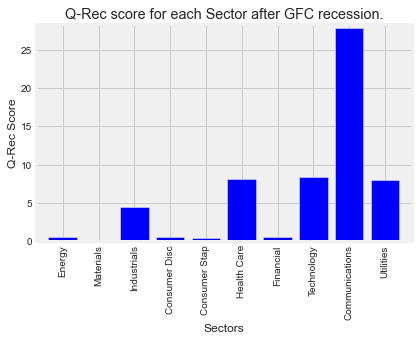

In [44]:
# Dot-Com recession:
# Create bar chart.

sectors=Eve_to_Recovery_df["Sector"].tolist()
QRec = Eve_to_Recovery_df["QRec"].tolist()

x_axis=np.arange(len(QRec))
plt.bar(x_axis, QRec, color="b", align="center")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, sectors, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("Q-Rec score for each Sector after GFC recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

plt.savefig(f"QRec by Sector ({GFC_start.year}).png") 


In [45]:
# Dot-Com recession:
# Establish paths for CSV import in next step.

Market = "Dot_Com_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market_df = pd.read_csv(Market)


# Rename the column headers to avoid conflicts when merging data frames.

Market_Cleaned_df=Market_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})

#Determine the Market price on the eve of the recession.

Market_Price_Eve = Market_Cleaned_df["Market Close"][0]
Market_eve_date=Market_Cleaned_df["Date"][0]
Market_Price_Eve


1239.93994140625

In [46]:
# Dot-Com recession:
# Establish paths for CSV import in next step.

Market2 = "Post_Dot_Com_Recession/^GSPC.csv"


# Create a data frame for the market using its CSV file.

Market2_df = pd.read_csv(Market2)


# Rename the column headers to avoid conflicts when merging data frames.

Market2_Cleaned_df=Market2_df.rename(columns={"Open":"Market Open", "High": "Market High", "Low": "Market Low", "Close":"Market Close", "Adj Close":"Adj Close Market", "Volume":"Market Volume"})


In [47]:
# Dot-Com recession:
# Establish an empty list to house the market's recovery date. 

market_recovery_date=[]


# Analyse the market's recovery.

Market_Higher_Than_Eve_df=Market2_Cleaned_df.loc[Market2_Cleaned_df["Market Close"]>= Market_Price_Eve, :]
Market_Recovery_First_Row=Market_Higher_Than_Eve_df.iloc[0,:].tolist()
Market_Recovery_Date=Market_Recovery_First_Row[0]
Market_Recovery_Date


'2005-07-28'

In [48]:
# Dot-Com recession:
# Determine the number of days between Recession End and Recovery Date for the market.

market_recovery_date=[]
for sector in sectors_title:
    market_recovery_date.append(Market_Recovery_Date)

    
# Put the recovery dates in their own data frame.

Market_Recovery_Date_df=pd.DataFrame({"Market Recovery Date":market_recovery_date, "Sector":sectors_title})


# Merge the market recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_MARKET2_df=pd.merge(Eve_to_Recovery_df, Market_Recovery_Date_df, on='Sector')


# Format all of the dates so as to remove the time.

Eve_to_Recovery_MARKET2_df['Market Recovery Date'] = pd.to_datetime(Eve_to_Recovery_MARKET2_df['Market Recovery Date']).dt.date


# Determine the number of days between Recession Start and Recovery Date for each sector.

Market_Days_To_Recover=Eve_to_Recovery_MARKET2_df['Market Recovery Date']-Eve_to_Recovery_MARKET2_df['Recession End']
Eve_to_Recovery_MARKET2_df["Market Days to Recover"]=Market_Days_To_Recover


# Express the recovery time as a percentage of the recession length for the market.

Market_QRec_df=Eve_to_Recovery_MARKET2_df['Market Days to Recover']/Eve_to_Recovery_MARKET2_df['Length of Recession']
Eve_to_Recovery_MARKET2_df["Market QRec"]=Market_QRec_df
Eve_to_Recovery_MARKET2_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,QRec,Market Recovery Date,Market Days to Recover,Market QRec
0,2001-02-28,2001-11-01,Energy,228.330002,2002-03-12,131 days,246 days,0.532520,2005-07-28,1365 days,5.54878
1,2001-02-28,2001-11-01,Materials,129.309998,2001-11-07,6 days,246 days,0.024390,2005-07-28,1365 days,5.54878
2,2001-02-28,2001-11-01,Industrials,278.459991,2004-11-08,1103 days,246 days,4.483740,2005-07-28,1365 days,5.54878
3,2001-02-28,2001-11-01,Consumer Disc,248.389999,2002-03-04,123 days,246 days,0.500000,2005-07-28,1365 days,5.54878
4,2001-02-28,2001-11-01,Consumer Stap,225.770004,2002-02-20,111 days,246 days,0.451220,2005-07-28,1365 days,5.54878
5,2001-02-28,2001-11-01,Health Care,406.899994,2007-04-13,1989 days,246 days,8.085366,2005-07-28,1365 days,5.54878
6,2001-02-28,2001-11-01,Financial,368.839996,2002-03-15,134 days,246 days,0.544715,2005-07-28,1365 days,5.54878
7,2001-02-28,2001-11-01,Technology,404.579987,2007-07-12,2079 days,246 days,8.451220,2005-07-28,1365 days,5.54878
8,2001-02-28,2001-11-01,Communications,202.630005,2020-08-25,6872 days,246 days,27.934959,2005-07-28,1365 days,5.54878
9,2001-02-28,2001-11-01,Utilities,201.240005,2007-03-21,1966 days,246 days,7.991870,2005-07-28,1365 days,5.54878


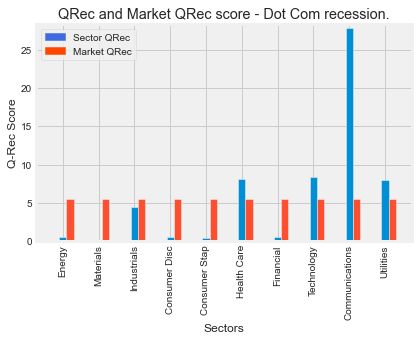

In [49]:
# Dot-Com recession:
# Create bar chart for Sector QRec and Market QRec.

w=0.2
x=Eve_to_Recovery_MARKET2_df["Sector"].tolist()

QRec = Eve_to_Recovery_MARKET2_df["QRec"].tolist()
Market_QRec = Eve_to_Recovery_MARKET2_df["Market QRec"].tolist()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, QRec, w, label="sector")
plt.bar(bar2, Market_QRec, w, label="market")

plt.xticks(bar1, x, rotation='vertical')

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(QRec)+0.5)

plt.title("QRec and Market QRec score - Dot Com recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

colors = {'Sector QRec':'royalblue', 'Market QRec':'orangered'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig(f"QRec and Market QRec by Sector ({Dot_Com_start.year}).png")

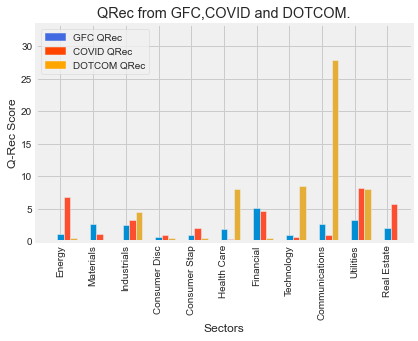

In [50]:
# Dot-Com recession:
# Create bar chart for Sector QRec and Market QRec.

w=0.2
x=Eve_to_Recovery_MARKET1_df["Sector"].tolist()

QRecDOTCOM = Eve_to_Recovery_MARKET2_df["QRec"].tolist()
QRecDOTCOM.append(0)
QRecGFC = Eve_to_Recovery_MARKET1_df["QRec"].tolist()
QRecCOVID = Eve_to_Recovery_MARKET_df["QRec"].tolist()

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+2*w for i in bar1]

plt.bar(bar1, QRecGFC, w, label="GFC")
plt.bar(bar2, QRecCOVID, w, label="COVID")
plt.bar(bar3, QRecDOTCOM, w, label="DOTCOM")

plt.xticks(bar1, x, rotation='vertical')

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(QRec)+5.5)

plt.title("QRec from GFC,COVID and DOTCOM.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

colors = {'GFC QRec':'royalblue', 'COVID QRec':'orangered', 'DOTCOM QRec':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig(f"QRec for GFC, COVID and DOTCOM by Sector.png")  